##  Decision Tree with our Churn data
**Steps**:
- Read the data
- Set up dependent and independent data
- Import sklearn.tree
- Construct and fit decision tree
- Plot decision tree

In [2]:
#Import packages
import pandas as pd
import sklearn.metrics as metrics # for the confusion matrix
import matplotlib.pyplot as plt # for plotting
import sklearn.tree as tree # Decision trees

churn = pd.read_excel('customerchurn.xlsx', sheet_name = 'Snapshot')
churn.head()



,CustomerID,Average orders (last 3 months),Total spend (last 3 months),Average orders/month (all time),Average spend/order (all time),Days since first order,Repeat customer (next 3 months),Predictions of a Repeat customer
0,1,0.00,0.0000,0.00,31.26,107,True,False
1,2,5.01,124.0476,5.01,26.28,108,True,True
2,3,3.00,27.0000,3.44,10.52,77,True,True
3,4,3.79,34.1100,3.79,10.52,125,True,True
4,5,0.00,0.0000,0.00,10.52,102,False,False


In [3]:
#Set up the dependent variable
dependent = churn['Repeat customer (next 3 months)']
dependent

0        True
1        True
2        True
3        True
4       False
        ...  
1517     True
1518     True
1519    False
1520     True
1521    False
Name: Repeat customer (next 3 months), Length: 1522, dtype: bool

In [4]:
churn.columns

Index(['CustomerID', 'Average orders (last 3 months)',
       'Total spend (last 3 months)', 'Average orders/month (all time)',
       'Average spend/order (all time)', 'Days since first order',
       'Repeat customer (next 3 months)', 'Predictions of a Repeat customer'],
      dtype='object')

In [5]:
#Set up the independent variable
independent = churn[['Average orders (last 3 months)', 
                'Total spend (last 3 months)',
                'Average orders/month (all time)',
                'Average spend/order (all time)', 
                'Days since first order']]

independent


,Average orders (last 3 months),Total spend (last 3 months),Average orders/month (all time),Average spend/order (all time),Days since first order
0,0.00,0.0000,0.00,31.26,107
1,5.01,124.0476,5.01,26.28,108
2,3.00,27.0000,3.44,10.52,77
3,3.79,34.1100,3.79,10.52,125
4,0.00,0.0000,0.00,10.52,102
...,...,...,...,...,...
1517,4.49,80.1914,4.49,19.38,141
1518,2.50,53.1500,2.50,22.78,167
1519,0.00,0.0000,2.44,32.34,129
1520,1.00,40.3800,1.00,41.90,117


In [6]:
#Set up the Decision Tree
import sklearn.tree as tree # Decision trees

tree_object = tree.DecisionTreeClassifier(random_state = 96, max_depth = 1)
tree_object.fit(independent, dependent)

DecisionTreeClassifier(max_depth=1, random_state=96)

Average orders (last 3 months)


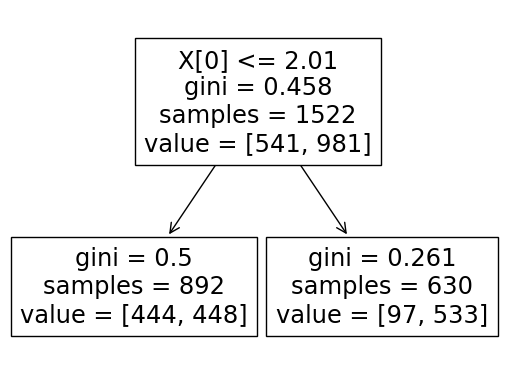

In [7]:
#Visualise the Decision tree. Remember if the condition is true go left, if it's false go right

tree.plot_tree(tree_object);

print(independent.columns[0])

### Let's break down this line to see what's happening:


To recap a decision tree is trying to find the most effective independent variable that splits data in way
that gives us the best prediction on our data.  We are trying to find the best independent variable that allows us to predict whether or not a customer will be repeat buyer in the next 3 months

- x[0] is the first predictor variable (average orders per month for the last 3 months)
- x[0] <= 2.01 is TRUE  we go to the left part of the decision tree, if it's FALSE (x[0] > 2.01) we go right

### Going left:
- if Average orders (last 3 months) <=2.01 we go left here and this takes us to the 'value = [444,448]'
- the value on the left (444) is the zero in this case so this is the number of people that are not repeat buyers and the chance is  49.8% (444/(444 + 448))
- the value on the right(448) is the 1 in this case so this is the number of people that are repeat buyers and the chance is 51.2% (448/(444 + 448))

### Going right:
- if Average orders (last 3 months) >2.01 we go right here and this takes us to the 'value = [97,533]'
- the value on the left (97) is the zero in this case so this is the number of people that are not repeat buyers and the chance is a 15.4% (97/(97 + 533))
- the value on the right(533) is the 1 in this case so this is the number of people that are repeat buyers and the chance is 84.6% (533/(97+ 533))

So the **conclusion** is that the more you buy, the more you likely you are to buy in succeeding 3 months.  Our 1 level Decision tree is fairly accurate at predicting whether a customer will repeat in the next 3 months (84.6%) but is not so accurate at predicting whether a customer is likely to not be a repeat customers (49.8%)




### Let's test the logic

If you're ever not sure lets test out the logic by creating a variable with decision tree rules:

> independent['Cond'] = independent['Average orders (last 3 months)']>2.01

> independent.groupby('Cond').count()

This confirm that 630 people are defined as **TRUE**

In [8]:
# If you're ever not sure lets test out the logic here

churn['Cond'] = churn['Average orders (last 3 months)'] >2.01

churn.groupby('Cond').count()


,CustomerID,Average orders (last 3 months),Total spend (last 3 months),Average orders/month (all time),Average spend/order (all time),Days since first order,Repeat customer (next 3 months),Predictions of a Repeat customer
Cond,,,,,,,,
False,892,892,892,892,892,892,892,892
True,630,630,630,630,630,630,630,630


In [9]:
churn.groupby(['Cond','Repeat customer (next 3 months)']).count()

CustomerID  \
Cond  Repeat customer (next 3 months)               
False False                                   444   
      True                                    448   
True  False                                    97   
      True                                    533   

                                       Average orders (last 3 months)  \
Cond  Repeat customer (next 3 months)                                   
False False                                                       444   
      True                                                        448   
True  False                                                        97   
      True                                                        533   

                                       Total spend (last 3 months)  \
Cond  Repeat customer (next 3 months)                                
False False                                                    444   
      True                                                     448   
True  False                                                     97   
      True                                                     533   

                                       Average orders/month (all time)  \
Cond  Repeat customer (next 3 months)                                    
False False                                                        444   
      True                                                         448   
True  False                                                         97   
      True                                                         533   

                                       Average spend/order (all time)  \
Cond  Repeat customer (next 3 months)                                   
False False                                                       444   
      True                                                        448   
True  False                                                        97   
      True                                                        533   

                                       Days since first order  \
Cond  Repeat customer (next 3 months)                           
False False                                               444   
      True                                                448   
True  False                                                97   
      True                                                533   

                                       Predictions of a Repeat customer  
Cond  Repeat customer (next 3 months)                                    
False False                                                         444  
      True                                                          448  
True  False                                                          97  
      True                                                          533

In [9]:
# Alternative - Pivot Table 
# Note it has all the elements of a Pivot Table

pd.pivot_table(churn, 
               values='CustomerID', # VALUE we want to query
               index='Repeat customer (next 3 months)', #indicates what you want in the ROWS
               columns='Cond', # Indicates what you want in the COLUMN
               aggfunc='count') # Statistic we want to apply

Cond,False,True
Repeat customer (next 3 months),,
False,444,97
True,448,533


We can also create a confusion matrix using sklearn which is something we'll delve into more in the logistic regression workshop

In [10]:
#Confusion matrix

metrics.confusion_matrix(churn['Repeat customer (next 3 months)'],churn['Average orders (last 3 months)'] >2.01)

array([[444,  97],
       [448, 533]], dtype=int64)